In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv('HMA_housingdata.csv')

In [3]:
#dataframe['number_of_room'] = dataframe['number_of_room'].astype('float').astype('int')

In [4]:
#dataframe.head()

In [5]:
#dataframe = dataframe.drop(columns=['Municipality'])
#dataframe.head()

In [6]:
#dataframe = dataframe.replace({'Elevator': {'on': 1, 'ei': 0}, 'Condition': {'hyvä': 1, 'tyyd.': 2, 'huono':3}})
#dataframe['hassauna'] = dataframe['hassauna'].astype(str)
#dataframe = dataframe.replace({'hassauna': {'True': 1, 'False': 0}})

In [3]:
dataframe.head()

,Municipality,area,Price,sqft,Year,Elevator,Condition,Energial.,number_of_room,hassauna,floor,total_floor
0,Kamppi,23.0,243000,10565,1932,1,2,E2018,1,0,1,5
1,Punavuori,41.0,340250,8299,2001,1,2,E2007,1,0,6,8
2,Kallio,37.0,240000,6486,1939,1,1,F2013,1,0,6,6
3,Kamppi,24.0,236000,9833,1936,1,1,E2018,1,0,2,4
4,Pajamäki,25.0,137100,5484,1959,0,2,F2013,1,0,2,4


In [4]:
del dataframe['Energial.']

In [5]:
dataframe.head()

,Municipality,area,Price,sqft,Year,Elevator,Condition,number_of_room,hassauna,floor,total_floor
0,Kamppi,23.0,243000,10565,1932,1,2,1,0,1,5
1,Punavuori,41.0,340250,8299,2001,1,2,1,0,6,8
2,Kallio,37.0,240000,6486,1939,1,1,1,0,6,6
3,Kamppi,24.0,236000,9833,1936,1,1,1,0,2,4
4,Pajamäki,25.0,137100,5484,1959,0,2,1,0,2,4


In [6]:
dataframe['total_floor'] = dataframe['total_floor'].astype('str').astype('int')

In [7]:
dataframe.dtypes

Municipality       object
area              float64
Price               int64
sqft                int64
Year                int64
Elevator            int64
Condition           int64
number_of_room      int64
hassauna            int64
floor               int64
total_floor         int64
dtype: object

In [8]:
dataframe = dataframe.drop(columns=['Municipality'])
dataframe.head()

,area,Price,sqft,Year,Elevator,Condition,number_of_room,hassauna,floor,total_floor
0,23.0,243000,10565,1932,1,2,1,0,1,5
1,41.0,340250,8299,2001,1,2,1,0,6,8
2,37.0,240000,6486,1939,1,1,1,0,6,6
3,24.0,236000,9833,1936,1,1,1,0,2,4
4,25.0,137100,5484,1959,0,2,1,0,2,4


# Inspect the data

In [9]:
dataframe.shape

(4652, 10)

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

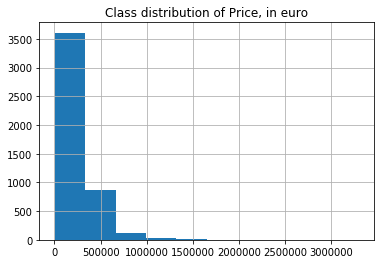

In [12]:
dataframe.Price.hist()
plt.title('Class distribution of Price, in euro')
plt.show()

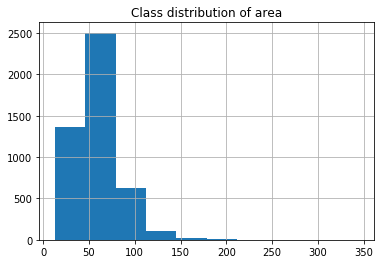

In [13]:
dataframe.area.hist()
plt.title('Class distribution of area')
plt.show()

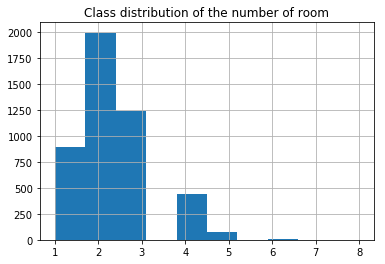

In [14]:
dataframe.number_of_room.hist()
plt.title('Class distribution of the number of room')
plt.show()

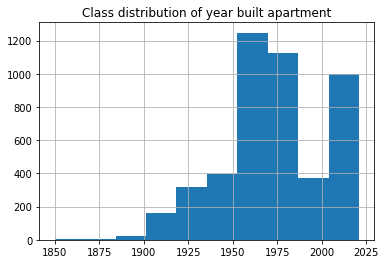

In [15]:
dataframe.Year.hist()
plt.title('Class distribution of year built apartment')
plt.show()

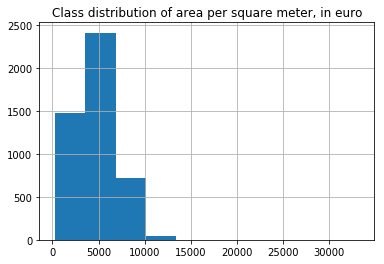

In [16]:
dataframe.sqft.hist()
plt.title('Class distribution of area per square meter, in euro')
plt.show()

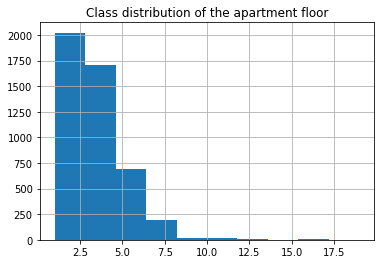

In [17]:
dataframe.floor.hist()
plt.title('Class distribution of the apartment floor')
plt.show()

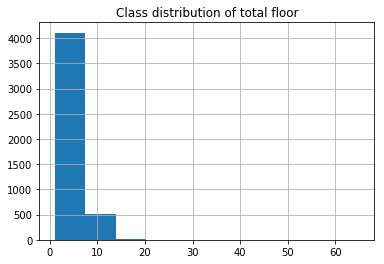

In [18]:
dataframe.total_floor.hist()
plt.title('Class distribution of total floor')
plt.show()

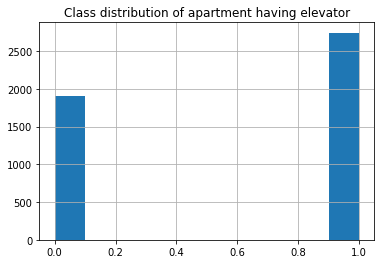

In [19]:
dataframe.Elevator.hist()
plt.title('Class distribution of apartment having elevator')
plt.show()

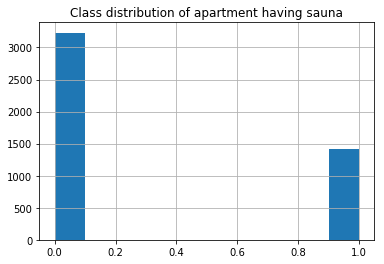

In [20]:
dataframe.hassauna.hist()
plt.title('Class distribution of apartment having sauna')
plt.show()

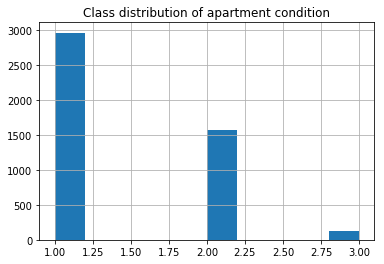

In [21]:
dataframe.Condition.hist()
plt.title('Class distribution of apartment condition')
plt.show()

In [22]:
import seaborn as sns

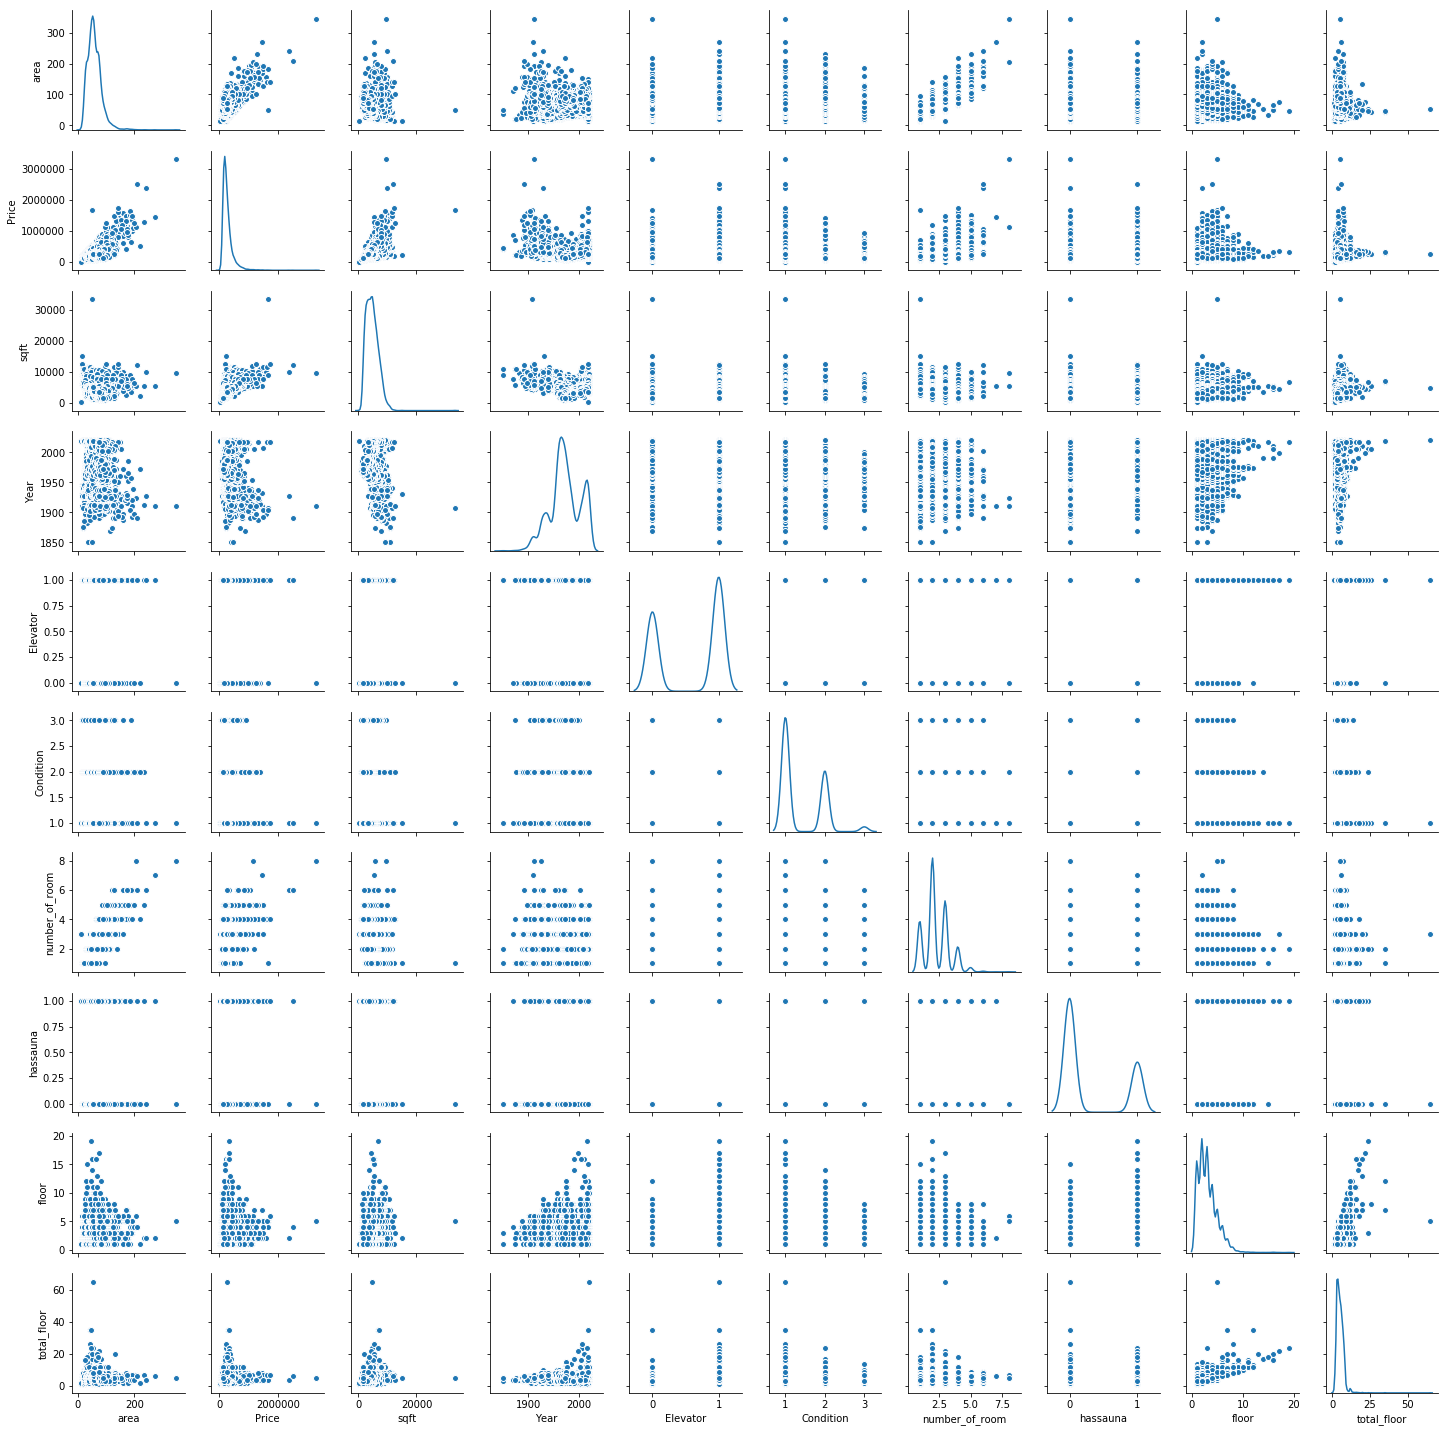

In [23]:
sns_plot = sns.pairplot(dataframe[['area','Price','sqft','Year','Elevator','Condition','number_of_room','hassauna','floor','total_floor']], diag_kind='kde', size=2)

In [24]:
sns_plot.savefig("crossgraph.png")

## Observing the correlation among different attributes 

Text(0.5,1,'housing attribute correlation')

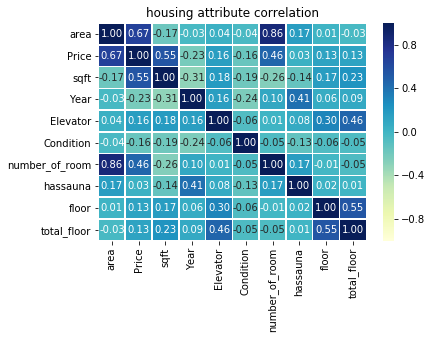

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataframe.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("housing attribute correlation")

## Neural network using sklearn

R2 score is: 0.940717802792765


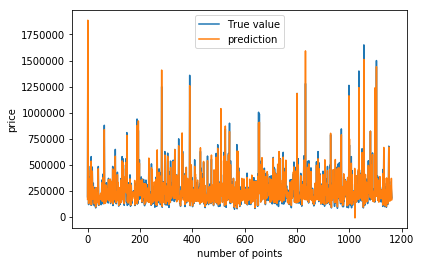

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
DF = dataframe.copy()
features = ['area', 'sqft', 'Year', 'Elevator', 'Condition', 'number_of_room',
       'hassauna', 'floor', 'total_floor']
X        = DF[features].values
y        = DF["Price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
NN = MLPRegressor(solver = 'lbfgs')
NN.fit(X_train, y_train)
pred = NN.predict(X_test)
print('R2 score is:', r2_score(y_test, pred))
plt.plot(y_test, label = "True value")
plt.plot(pred, label = "prediction")
plt.ylabel('price')
plt.xlabel('number of points')
plt.legend()

Text(0,0.5,'Predictions')

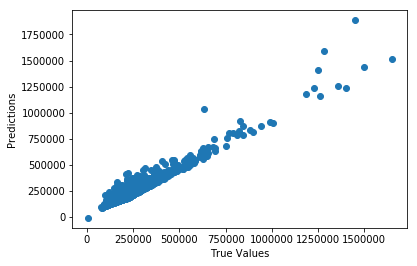

In [27]:
plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Hedonic Linear regression using sklearn

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
pred_reg = reg.predict(X_test)

In [29]:
print('R2 score is:' , reg.score(X_train, y_train))

R2 score is: 0.9117066272352922


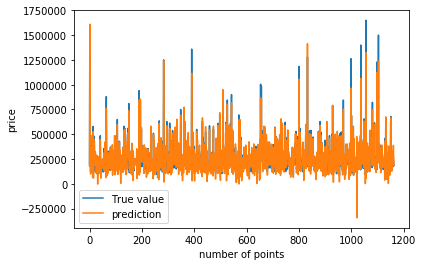

In [30]:
plt.plot(y_test, label = "True value",)
plt.plot(pred_reg, label = "prediction")
plt.ylabel('price')
plt.xlabel('number of points')
plt.legend()

Text(0,0.5,'Predictions')

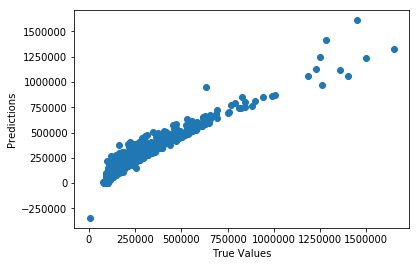

In [31]:
plt.scatter(y_test, pred_reg)
plt.xlabel('True Values')
plt.ylabel('Predictions')